<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>ASP.NET Core به صورت خودکار سعی می‌کند مقادیر پارامترها را به پارامترهای endpointها بایند کند. این مقادیر می‌توانند از مسیر (route) یا query string گرفته شوند.</p>

<h5>1. بایند کردن از مسیر (Route Binding)</h5>
<p>اگر نام پارامتر handler با نام پارامتر مسیر در template مسیر مطابقت داشته باشد، ASP.NET Core آن پارامتر را به مقدار مرتبط با مسیر بایند می‌کند.</p>

</div>

In [ ]:
app.MapGet("/products/{id}", ([FromRoute]int id) => $"Received {id}");

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>2. بایند کردن از query string (Query String Binding)</h5>
<p>اگر نام پارامتر handler با هیچ‌کدام از پارامترهای مسیر مطابقت نداشته باشد، ASP.NET Core سعی می‌کند مقدار پارامتر را از query string بایند کند.</p>
</div>

In [ ]:
app.MapGet("/products", ([FromQuery]int id) => $"Received {id}");

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>در این مثال، اگر درخواستی به <code>/products?id=456</code> ارسال شود، <code>id</code> به <code>456</code> بایند می‌شود و تابع handler با <code>id=456</code> فراخوانی می‌شود.</p>

<h5>استفاده از Attributes برای Binding</h5>
<p>علاوه بر این بایند کردن خودکار، شما می‌توانید با استفاده از attributes مشخص کنید که یک پارامتر باید از چه منبعی بایند شود.</p>

<h5>[FromRoute]</h5>
<p>این attribute به طور صریح نشان می‌دهد که پارامتر باید از مسیر بایند شود.</p>

<h5>[FromQuery]</h5>
<p>این attribute به طور صریح نشان می‌دهد که پارامتر باید از query string بایند شود.</p>

<h5>[FromHeader]</h5>
<p>این attribute به طور صریح نشان می‌دهد که پارامتر باید از header بایند شود.</p>
</div>

In [ ]:
app.MapGet("/products/{id}", ([FromRoute] int id) 
    => $"Received {id}");

app.MapGet("/products", ([FromQuery] int id) 
    => $"Received {id}");
    
app.MapGet("/products", ([FromHeader] string myHeader) 
    => $"Received header value: {myHeader}");


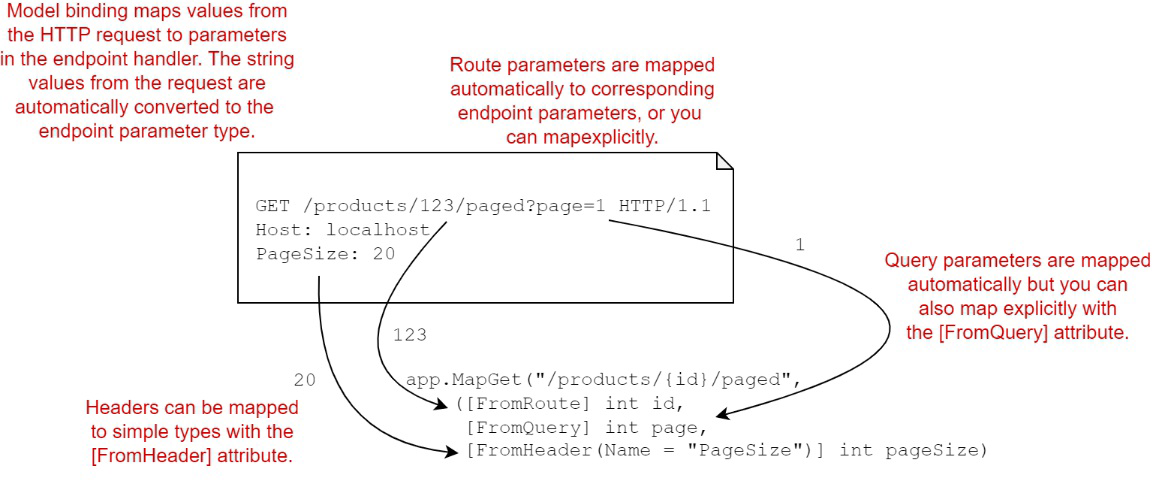

In [ ]:
using Microsoft.AspNetCore.Mvc;

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

app.MapGet("/products/{id}/paged",
    ([FromRoute] int id, 
     [FromQuery] int page, 
     [FromHeader(Name = "PageSize")] int pageSize) 
    => $"Received id {id}, page {page}, pageSize {pageSize}");
    
app.Run();

For **get value from header**, ***you must*** use `[FromHeader]` attribute.

if you try to **bind a type** to an `incompatible value`, ASP.NET Core throws a `BadHttpRequestException` and returns a `400 Bad Request response`

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>تعریف "Simple Types"</h5>
<p>"Simple types" به انواعی اشاره دارد که یکی از دو متد <code>TryParse</code> زیر را پیاده‌سازی کرده باشند، جایی که <code>T</code> نوع پیاده‌سازی است:</p>
</div>

In [ ]:
public static bool TryParse(string value, out T result);
public static bool TryParse(
    string value, IFormatProvider provider, out T result);

//Types such as int and bool contain one (or both) these methods.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>شما می‌توانید انواع سفارشی خود را ایجاد کنید که یکی از متدهای <code>TryParse</code> را پیاده‌سازی کنند. این نوع‌ها نیز به عنوان انواع ساده شناخته می‌شوند و می‌توانند از مسیر، query string و headers بایند شوند.</p>
</div>

In [ ]:
public class ProductId
{
    public string Id { get; set; }

    public static bool TryParse(string value, out ProductId result)
    {
        if (!string.IsNullOrEmpty(value))
        {
            result = new ProductId { Id = value };
            return true;
        }

        result = null;
        return false;
    }
}

app.MapGet("/product/{id}", (ProductId id) => $"Received product ID: {id.Id}");

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>حال، اگر درخواستی به <code>/product/p123</code> ارسال شود، ASP.NET Core متوجه می‌شود که نوع <code>ProductId</code> که در handler استفاده شده، متد <code>TryParse</code> را دارد و نام پارامتر <code>id</code> با نام پارامتر مسیر مطابقت دارد. بنابراین، ASP.NET Core متد <code>ProductId.TryParse()</code> را فراخوانی کرده و مقدار <code>p123</code> را به آن می‌فرستد.</p>
</div>

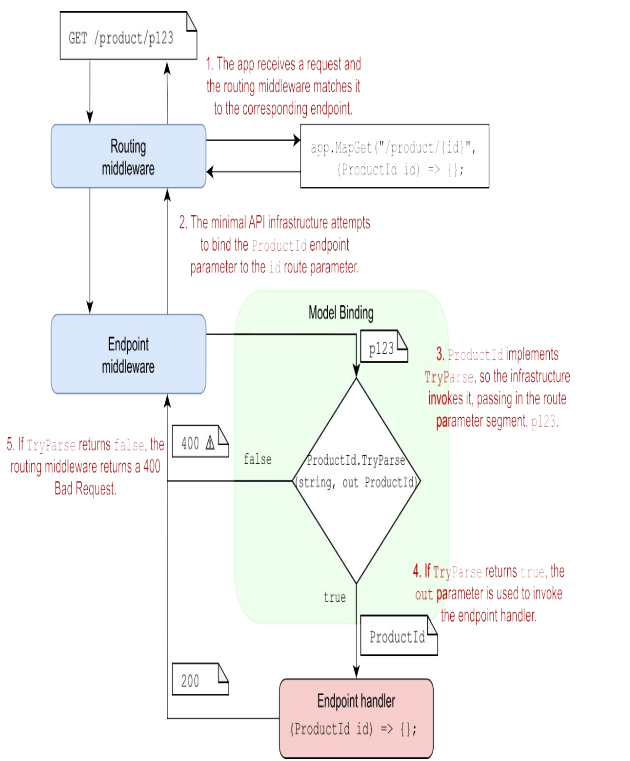